In [1]:
library(readr)
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Exploring USGS data 

## Target-chemical concentrations and microbiological results in surface water and tapwater, Montana, 2022

[Link](https://www.sciencebase.gov/catalog/item/6400a064d34edc0ffaf4ef1b) to website with more info and metadata 

## Spatial (table 1: site info)

Rows: 27 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): USGS_station_number, USGS_station_name, Sample_time_(HHMM), Site_ty...
dbl (1): Sample_date_(yyyymmdd)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [27 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ USGS_station_number   : chr [1:27] "T452540108321601" "T452500108320026" "T451800107540001" "T452000107520002" ...
 $ USGS_station_name     : chr [1:27] "05S26E05ACC 01 [MTTW2022 025]" "05S26E06DAD026 MTTW2022 026" "06S31E16DA001 MTTW2022 001" "06S31E02EE002 MTTW2022 002" ...
 $ Sample_date_(yyyymmdd): num [1:27] 20220808 20220808 20220808 20220808 20220808 ...
 $ Sample_time_(HHMM)    : chr [1:27] "0920" "1000" "1200" "1240" ...
 $ Site_type             : chr [1:27] "Public supply" "Public supply" "Private well" "Private well" ...
 $ Medium_code           : chr [1:27] "WT" "WT" "WG" "WG" ...
 - attr(*, "spec")=
  .. cols(
  ..   USGS_station_number = col_character(),
  ..   USGS_station_name = col_character(),
  ..   `Sample_date_(yyyymmdd)` = col_double(),
  ..   `Sample_time_(HHMM)` = col_character(),
  ..   Site_type = col_character(),
  ..   Medium_code = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


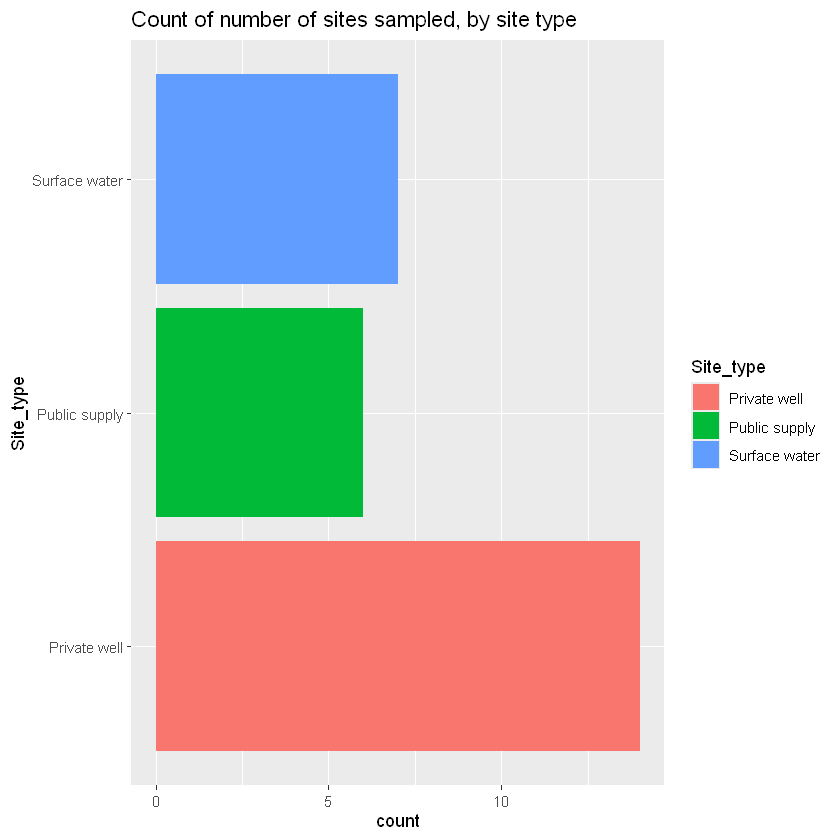

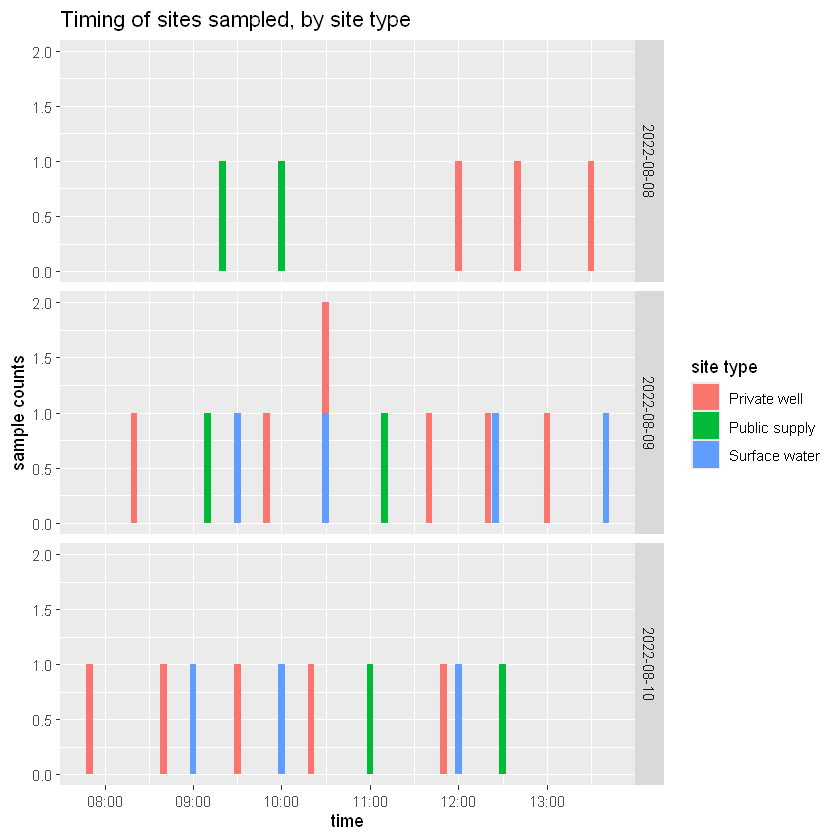

In [2]:
table1 <- read_delim("usgs/table1_site_info.csv", 
     delim = "\t", escape_double = FALSE, 
     trim_ws = TRUE)

str(table1)

table1$date = ymd(table1$`Sample_date_(yyyymmdd)`)

format_time = paste0(substr(table1$`Sample_time_(HHMM)`, 1,2),
                     ":",
                     substr(table1$`Sample_time_(HHMM)`,3,4))

table1$time = hm(format_time)

table1$datetime = as_date(table1$date, table1$time)

ggplot(table1) + 
  geom_bar(aes(x=Site_type, fill=Site_type)) +
  coord_flip() +
  ggtitle("Count of number of sites sampled, by site type")

ggplot(table1, aes(x=as_datetime(time), fill=Site_type)) + 
  geom_bar() + 
  facet_grid('date') + 
  labs(x="time", y="sample counts", fill = "site type") +
  ggtitle("Timing of sites sampled, by site type")

Questions from Table 1: 

- categorical data in site type - how many samples from each site? 
- when were samples taken? which day had the most sampling for each site type? What time of day was sampling the most frequent? 

---

## Table 3 Results 

In [4]:
# read in the csv 
tab3 <- read_delim("usgs/table3_results.csv", 
    delim = "\t", escape_double = FALSE, 
    trim_ws = TRUE)

# preview table 
head(tab3)

# see count of how many times unique parameter names appear
# table(tab3$Parameter_name) 

# view summary of taable 
data.frame(table(tab3$Parameter_name)) %>% summary()


New names:
• `` -> `...10`
Rows: 12659 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (8): USGS_station_number, Sample_time_(HHMM), Medium_code, NWIS_paramete...
dbl (1): Sample_date_(yyyymmdd)
lgl (1): ...10

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


USGS_station_number,Sample_date_(yyyymmdd),Sample_time_(HHMM),Medium_code,NWIS_parameter_code,Parameter_name,Remark_and_result,Units_of_measurement,Analyzing_laboratory,...10
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
T453657107270401,20220810,1000,WS,00010,"Temperature, water",24.7,deg C,Field personnel,NA
T452500108320026,20220808,1000,WT,00010,"Temperature, water",12.7,deg C,Field personnel,NA
T453800107270022,20220810,1020,WG,00010,"Temperature, water",17.4,deg C,Field personnel,NA
T451800107210006,20220809,1030,WG,00010,"Temperature, water",15.3,deg C,Field personnel,NA
T451943107212513,20220809,1030,WS,00010,"Temperature, water",21.2,deg C,Field personnel,NA
T453500107270024,20220810,1100,WT,00010,"Temperature, water",25.7,deg C,Field personnel,NA


                       Var1          Freq      
 1-Butanol               :  1   Min.   :26.00  
 1-Octanol               :  1   1st Qu.:26.00  
 1,1-Dichloro-2-propanone:  1   Median :26.00  
 1,1-Dichloroethane      :  1   Mean   :26.99  
 1,1-Dichloroethene      :  1   3rd Qu.:27.00  
 1,1-Difluoroethane      :  1   Max.   :78.00  
 (Other)                 :463                  

Which parameters do we care about the most? Examples of what we can do:

- if thresholds exist, see if any are over them 
- descriptive statistics for each of water site types 
- compare between groups - hypothesis testing 

### Water temperature data 

I'm going to start here with water temperature because it's what I'm most familiar with. 

We can also use this dataset to practice filtering to create subsets of data sets.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.80   13.85   15.80   17.28   21.05   25.70 

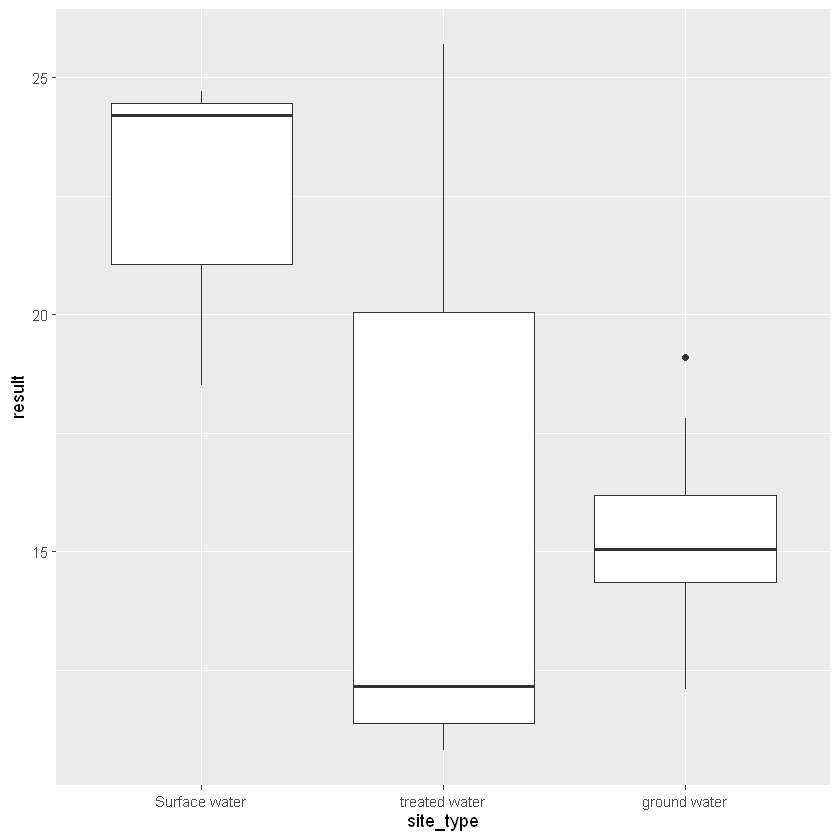

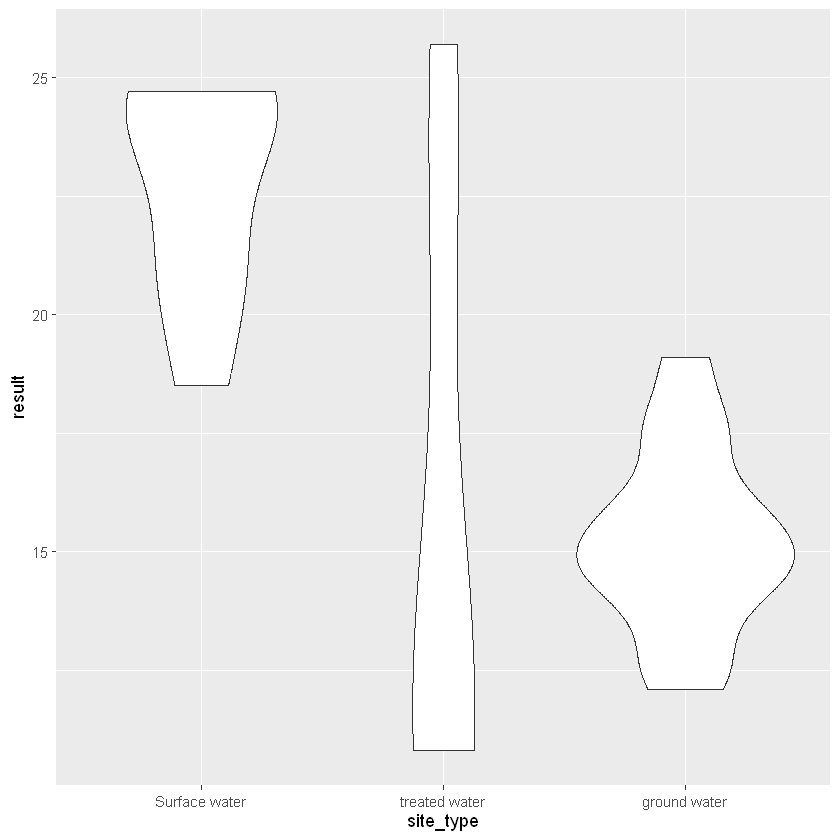

site_type,min,max,mean
<fct>,<dbl>,<dbl>,<dbl>
Surface water,18.5,24.7,22.62857
treated water,10.8,25.7,15.76667
ground water,12.1,19.1,15.25000


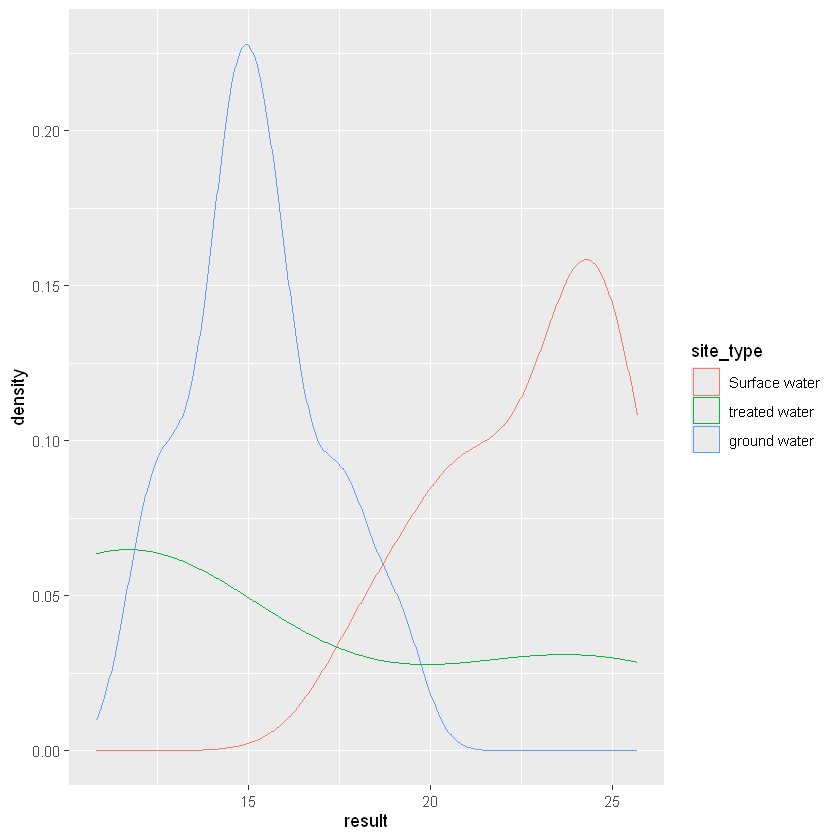

In [5]:
# filter by parameter name (I know it shows up as Temperature, water' because it is first in the list when I ran head(tab3))
temp = tab3 %>% filter(Parameter_name == 'Temperature, water') %>% 
  mutate(result = as.double(Remark_and_result))

summary(temp$result)

# summarize by site type 

# factor codes to labels 
# using factor assigns labels when we plot them 
temp$site_type = factor(temp$Medium_code, levels = c("WS","WT", "WG"),
                        labels = c("Surface water", 
                                    "treated water",
                                    "ground water"))

# different options to visualize distributions  
ggplot(temp, aes(x=site_type, y=result)) + geom_boxplot()

ggplot(temp, aes(x=site_type, y=result)) + geom_violin()

ggplot(temp, aes(x=result, col=site_type)) + geom_density()

# get summaries by type 
temp %>% group_by(site_type) %>% 
  summarise_at(vars(result), list(min=min, max=max, mean=mean))

Medium code: 

- WG, groundwater (private well); 
- WS, surface water; 
- WT, treated water (public supply)

Based on summary statistics we can see there is a difference in means across groups, but the treated and the groundwater have similar means. We can run a t test to test for significant difference. 


In [6]:
# test between private well ground water and treated well 
# first filter by code and select only results column 
gw = temp %>% filter(Medium_code == "WG") %>% select(result)
wt = temp %>% filter(Medium_code == "WT") %>% select(result)

# run t.test
t.test(gw, wt)

# we can also go surface water v one of these to compare t.test output 

gw = temp %>% filter(Medium_code == "WG") %>% select(result)
sw = temp %>% filter(Medium_code == "WS") %>% select(result)


t.test(gw, sw)


	Welch Two Sample t-test

data:  gw and wt
t = -0.18924, df = 5.3859, p-value = 0.8568
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.386188  6.352854
sample estimates:
mean of x mean of y 
 15.25000  15.76667 



	Welch Two Sample t-test

data:  gw and sw
t = -6.9733, df = 10.033, p-value = 3.774e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.735163 -5.021980
sample estimates:
mean of x mean of y 
 15.25000  22.62857 


From the p-values, we can see the GW and WT are not significantly different, but the GW and SW are significantly different in means. 


We could repeat this process for another variable by filtering by `Parameter_name`. 


## Table 6 Microbio 

In [7]:
tab6 <- read_delim("usgs/table6_microbio.csv", 
     delim = "\t", escape_double = FALSE, 
     trim_ws = TRUE)


names(tab6)

Rows: 27 Columns: 7
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): USGS_station_number, Site_type, HPC_CFU_per_1_mL
dbl (4): Sample_date_(yyyymmdd), Sample_time_(HHMM), Total_coliforms_CFU_per...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "USGS_station_number"            "Sample_date_(yyyymmdd)"        
[3] "Sample_time_(HHMM)"             "Site_type"                     
[5] "HPC_CFU_per_1_mL"               "Total_coliforms_CFU_per_100_mL"
[7] "E.coli_CFU_per_100_mL"

Three columns of results to check: 

- `HPC_CFU_per_1_mL`: heterotrophic plate count, measures the presence of microorganisms, not necessarily bad, indicator of overall bacteria amount in water. Vast majority of carbon consuming bacteria are harmless. Measured in colony forming units (CFU) per 1mL water. EPA enforces 'treatment technique' requirement that HPC concentrations should be under 500 CFU/mL. (source: [tap score](https://mytapscore.com/blogs/tips-for-taps/what-do-hpc-test-results-actually-mean))

- `Total_coliforms_CFU_per_100_mL`: fecal/environmental contamination - coliform bacteria are natural partof microbiology of intestinal tract of warm blooded mammals, also found in soil, other animals, and insects. Is an indicator bacteria for presence of disease-causing organisms. Drinking water standard is <1 or zero CFU/100mL  (source: [Know your H2O](https://www.knowyourh2o.com/indoor-6/total-coliform-bacteria))

- `E.coli_CFU_per_100_mL`: most common type of fecal coliform bacteria. Indicator of human and animal waste contamination. Exposure can cause sickness, and any amount detection is a problem for drinking water (source: [tap score](https://mytapscore.com/pages/contaminant-glossary))


 USGS_station_number Sample_date_(yyyymmdd) Sample_time_(HHMM)
 Length:27           Min.   :20220808       Min.   : 750      
 Class :character    1st Qu.:20220809       1st Qu.: 940      
 Mode  :character    Median :20220809       Median :1100      
                     Mean   :20220809       Mean   :1077      
                     3rd Qu.:20220810       3rd Qu.:1210      
                     Max.   :20220810       Max.   :1340      
  Site_type         HPC_CFU_per_1_mL   Total_coliforms_CFU_per_100_mL
 Length:27          Length:27          Min.   :   0.0                
 Class :character   Class :character   1st Qu.:   0.0                
 Mode  :character   Mode  :character   Median :  10.0                
                                       Mean   : 874.7                
                                       3rd Qu.:1600.0                
                                       Max.   :6300.0                
 E.coli_CFU_per_100_mL
 Min.   :  0.00       
 1st Qu.:  0.00       


Warning message:
"NAs introduced by coercion"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     2.5   526.9   244.2 10000.0       1 

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`)."


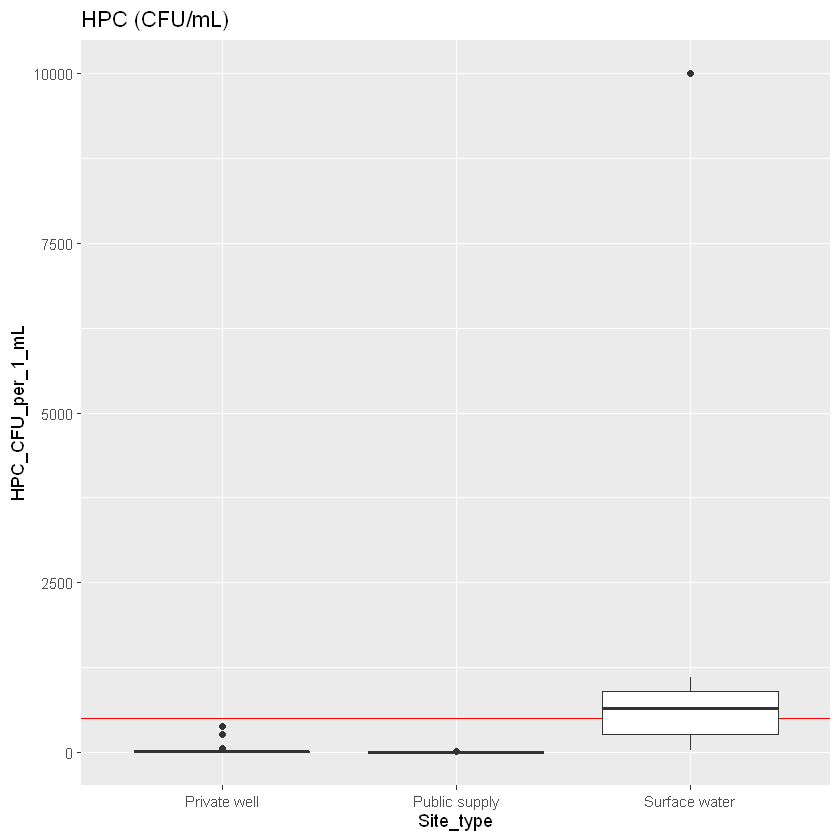

In [8]:
# quick summary
summary(tab6)

# fix HPC column - in summary we see it's listed as a character, but we expect this should be a double 
tab6$HPC_CFU_per_1_mL = as.double(tab6$HPC_CFU_per_1_mL)

summary(tab6$HPC_CFU_per_1_mL)

# plot the HPC distribution for each 
ggplot(tab6, aes(x=Site_type, y=HPC_CFU_per_1_mL)) + 
  geom_hline(aes(yintercept = 500), col='red') + 
  geom_boxplot() +
  ggtitle("HPC (CFU/mL)")

There were some samples with HPC values above 500 CFU/mL, suggesting that they would not meet EPA drinking water requirements. These were for surface water, while private wells and public supply were below this standard. 


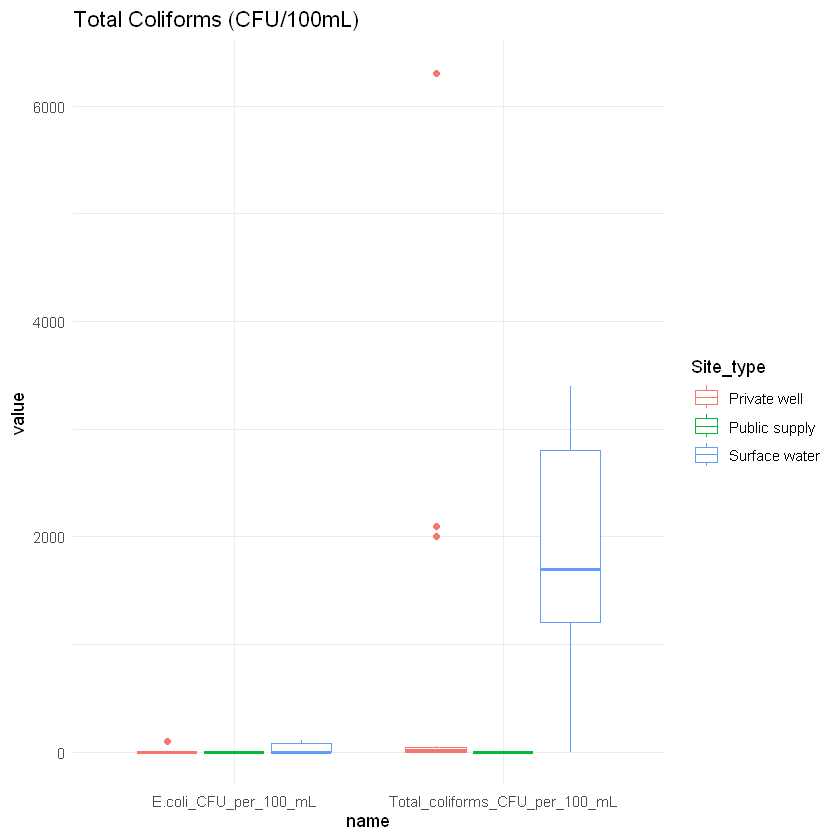

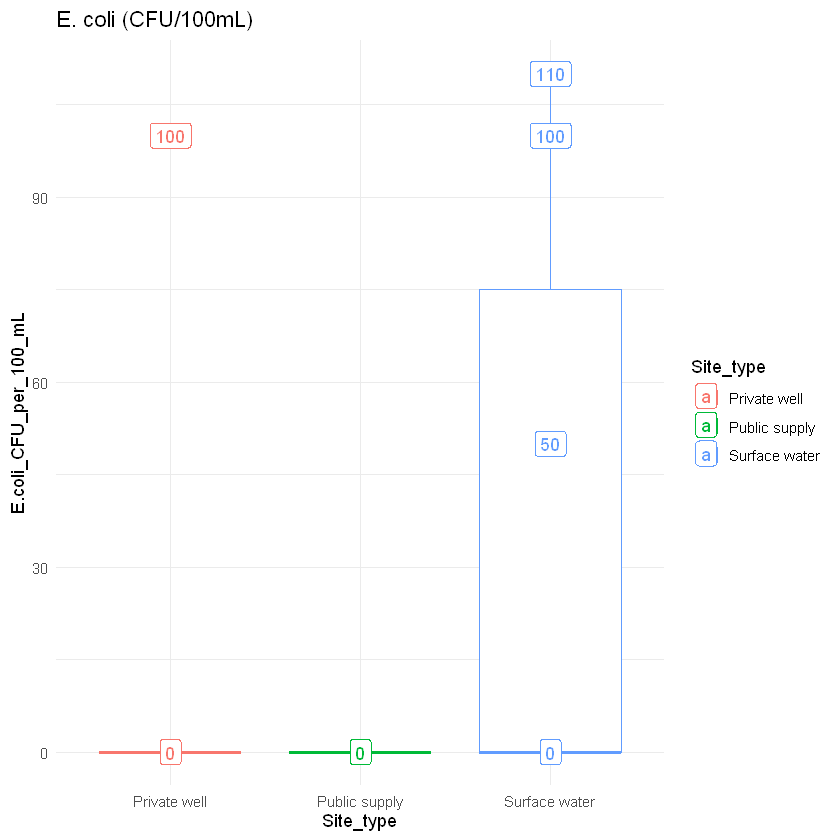

In [9]:
# plot the other columns
tab6 %>% 
  pivot_longer(cols=c(Total_coliforms_CFU_per_100_mL, E.coli_CFU_per_100_mL)) %>% 
  ggplot(aes(x=name, y=value, col=Site_type)) + 
  geom_boxplot() +
  ggtitle("Total Coliforms (CFU/100mL)") + 
  theme_minimal()

tab6 %>% 
  ggplot(aes(x=Site_type, y=E.coli_CFU_per_100_mL, col=Site_type)) + 
  geom_boxplot() + 
  ggtitle("E. coli (CFU/100mL)") + 
  theme_minimal() +
  geom_label(aes(label=E.coli_CFU_per_100_mL))

Surface water had the most e.coli detected, with at least one private well site having an outlier detected. 
No e.coli was found in the public supply samples. 

## Exploring other contaminants 

Table 3 contains results from many different contaminants and could be used for teaching and learning about water quality. 

The Environmental Protection Agency has a table for National Primary Drinking Water Regulations which lists microorganisms, metals, chemicals, and other contaminants. See the table [here](https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations).

The company tap score has a 'Contaminant Glossary' on their website which has information on specific contaminants. See the glossary [here](https://mytapscore.com/pages/contaminant-glossary). 


In [11]:
# select contaminant 
contaminant = "lead"

# check if exists in list 
string = str_detect(tolower(unique(tab3$Parameter_name)), tolower(contaminant))
ifelse(sum(string)==0, 
   paste("contaminant not detected in list, check spelling or try different"), 
   paste(contaminant, "was found in list"))

# filter by contaminant and factor the site type 
tab3_filt = tab3 %>%
  filter(tolower(Parameter_name)==tolower(contaminant)) %>% 
  mutate(result = as.double(Remark_and_result),
         site_type = factor(Medium_code, 
                            levels = c("WS","WT", "WG"),
                            labels = c("Surface water", 
                                        "treated water",
                                        "ground water")))

# check that the result column is a number and not char 
tab3_filt$result_check = as.double(ifelse(is.na(tab3_filt$result),                      str_split_i(tab3_filt$Remark_and_result, pattern="<", 2),
          tab3_filt$result))

# check out new data frame 
dim(tab3_filt)

head(tab3_filt)


[1] "lead was found in list"

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `result = as.double(Remark_and_result)`.
Caused by warning:
! NAs introduced by coercion"


[1] 27 13

USGS_station_number,Sample_date_(yyyymmdd),Sample_time_(HHMM),Medium_code,NWIS_parameter_code,Parameter_name,Remark_and_result,Units_of_measurement,Analyzing_laboratory,...10,result,site_type,result_check
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<fct>,<dbl>
T453657107270401,20220810,1000,WS,01051,Lead,<0.400,ug/L,RCL,NA,NA,Surface water,0.4
T452500108320026,20220808,1000,WT,01051,Lead,<0.400,ug/L,RCL,NA,NA,treated water,0.4
T453800107270022,20220810,1020,WG,01051,Lead,<0.400,ug/L,RCL,NA,NA,ground water,0.4
T451800107210006,20220809,1030,WG,01051,Lead,<0.400,ug/L,RCL,NA,NA,ground water,0.4
T451943107212513,20220809,1030,WS,01051,Lead,<0.400,ug/L,RCL,NA,NA,Surface water,0.4
T453500107270024,20220810,1100,WT,01051,Lead,<0.400,ug/L,RCL,NA,NA,treated water,0.4


Questions based on EPA table:

- What are the sources of the contaminant in drinking water?
- What are the potential health effects from long term exposure?
- Who is most at risk?
- What is the threshold amount to check for?

Questions for exploring data:

- Do these samples exceed the amount? 
- For the samples that exceed it, what is the site type? 
- Which site type contains the most? the least? 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4000  0.4000  0.4000  0.4259  0.4000  0.7000 

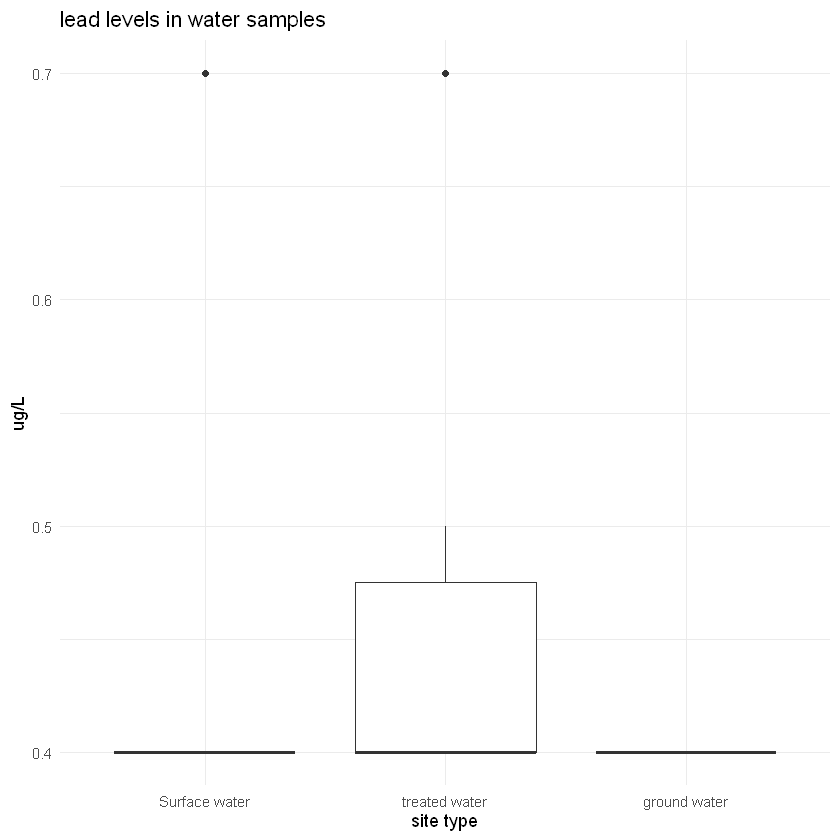

In [12]:
summary(tab3_filt$result_check)

tab3_filt %>% 
  ggplot(aes(x=site_type, y=result_check)) +
  geom_boxplot() +
  ggtitle(paste(contaminant, "levels in water samples")) +
  theme_minimal() +
  labs(y=paste(unique(tab3_filt$Units_of_measurement)),
       x="site type") 